# Counting Objects: Part III

In our [last notebook](https://github.com/JoshVarty/ImageClassification/blob/master/3_CountingAgain.ipynb) we saw that with enough data and sensible transforms we can train convolutional neural networks to classify pictures according to the number of cirlces in them. Even after adding circles of various sizes our network had no challenge reaching 100% accuracy.

The problem with approaching this problem as a classification problem is that it doesn't handle classes outside of the ones we've trained it on. In our last example we classified images with 45-49 objects in them. If we showed this network an image with 30 elements in it, it wouldn't know what to do.

For this reason, this problem is likely better forumalated as a regression problem.

In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import mean_squared_error

import random
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tnrange

In [17]:
def createNonOverlappingPoints(numElements):
    x = np.zeros((numElements)) + 2  #Place the cirlces offscreen
    y = np.zeros((numElements)) + 2  #Place the circles offscreen
    
    for i in range(0, numElements):
        
        foundNewCircle = False
        
        #Loop until we find a non-overlapping position for our new circle
        while not foundNewCircle:
            randX = random.uniform(-1, 1)
            randY = random.uniform(-1, 1)

            distanceFromOtherCircles = np.sqrt(np.square(x - randX) + np.square(y - randY))

            # Ensure that this circle is far enough away from all others
            if np.all(distanceFromOtherCircles > 0.2):
                break

        x[i] = randX
        y[i] = randY

    return x, y

In [19]:
def generateImages(numberOfPoints):
    directory = 'data/counting/' + str(numberOfPoints) + '/'
    os.makedirs(directory, exist_ok=True)
    
    #Create 200 images of this class
    for j in range(100):
        path = directory + str(j) + '.png'
        #Get points
        x, y = createNonOverlappingPoints(numberOfPoints)
        #Create plot
        plt.clf()
        axes = plt.gca()
        axes.set_xlim([-2,2])
        axes.set_ylim([-2, 2])
        plt.scatter(x,y, s=200)
        plt.axes().set_aspect('equal', 'datalim')
        #Save to disk
        plt.savefig(path)        

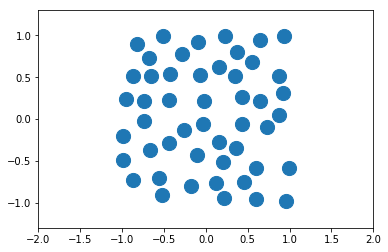

In [20]:
for i in tnrange(1, 50):
    generateImages(i)

In [106]:
path = 'data/counting'

np.random.seed(42)

def parseObjectCount(x):
    return float(str(x).split('/')[2])

# Only transform is flipping
transforms = get_transforms(flip_vert=True, 
                            max_zoom=0, 
                            max_rotate=0, 
                            max_lighting=0, 
                            max_warp=0,
                            p_affine=0,
                            p_lighting=0)

#Hack, I don't know how to remove crop and pad
flip_transform = transforms[0][1]
only_flip_transforms = [[flip_transform],[]]

print(only_flip_transforms)

data = (ImageItemList.from_folder(path)
 .random_split_by_pct(seed=42)
 .label_from_func(parseObjectCount, label_cls=FloatList)
 .transform(only_flip_transforms, size=224)
 .databunch()) 

print(help(data))
data.normalize(imagenet_stats)


data.show_batch(rows=3, figsize=(7,8))

[[RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)], []]


TypeError: __init__() got an unexpected keyword argument 'ds_tfms'

In [96]:
learner = create_cnn(data, models.resnet34, metrics=mean_squared_error)
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


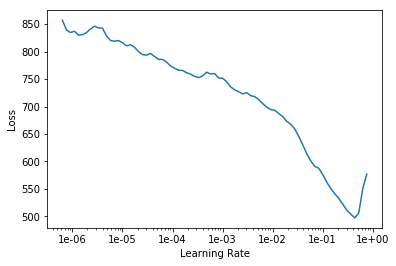

In [97]:
learner.lr_find()
learner.recorder.plot()

In [53]:
learner.fit_one_cycle(30, max_lr=slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,mean_squared_error
1,5.824306,0.194129,0.194129
2,6.427498,0.418244,0.418244
3,5.783371,0.022741,0.022741
4,5.481185,0.137388,0.137388
5,6.040299,0.208807,0.208807
6,6.245463,0.084464,0.084464
7,6.631799,2.538698,2.538698
8,6.931182,2.580016,2.580016
9,6.528994,0.074849,0.074849
10,6.862140,0.439593,0.439593


In [63]:
def generateTestImages(numberOfPoints):
    directory = 'data/counting/test/'
    os.makedirs(directory, exist_ok=True)
    path = directory + str(numberOfPoints) + '.png'
    #Get points
    x, y = createNonOverlappingPoints(numberOfPoints)
    #Create plot
    plt.clf()
    axes = plt.gca()
    axes.set_xlim([-2,2])
    axes.set_ylim([-2, 2])
    plt.scatter(x,y, s=200)
    plt.axes().set_aspect('equal', 'datalim')
    #Save to disk
    plt.savefig(path)     
    plt.clf()


/home/josh/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


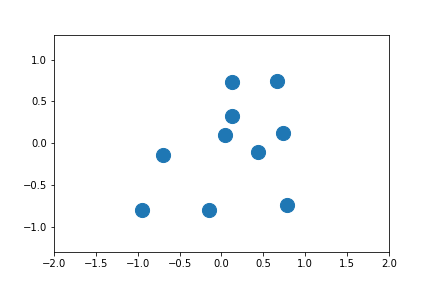

<Figure size 432x288 with 0 Axes>

In [65]:
generateTestImages(10)
img = open_image('data/counting/test/10.png')
img

In [71]:
pred_class, pred_ix, outputs = learner.predict(img)
pred_class


FloatItem [10.035409]

In [72]:
generateTestImages(2)
img = open_image('data/counting/test/2.png')
pred_class, pred_ix, outputs = learner.predict(img)
pred_class

/home/josh/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


FloatItem [2.102611]

<Figure size 432x288 with 0 Axes>

In [74]:
generateTestImages(50)
img = open_image('data/counting/test/50.png')
pred_class, pred_ix, outputs = learner.predict(img)
pred_class

/home/josh/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


FloatItem [49.07876]

<Figure size 432x288 with 0 Axes>

In [79]:
generateTestImages(65)
img = open_image('data/counting/test/65.png')
pred_class, pred_ix, outputs = learner.predict(img)
pred_class

/home/josh/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


FloatItem [73.272125]

<Figure size 432x288 with 0 Axes>